<a href="https://colab.research.google.com/github/medinadiegoeverardo/DS-Unit-2-Regression-Classification/blob/master/module1/medinadiego_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 156 (delta 6), reused 12 (delta 3), pack-reused 137
Receiving objects: 100% (156/156), 19.32 MiB | 21.32 MiB/s, done.
Resolving deltas: 100% (64/64), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 112kB 17.4MB/s 
     |████████████████████████████████| 133kB 56.4MB/s 
     |████████████████████████████████| 57.7MB 1.3MB/s 
     |████████████████████████████████| 235kB 45.8MB/s 
     |████████████████████████████████| 614kB 45.1MB/s 
     |████████████████████████████████| 235kB 15.7MB/s 
     |████████████████████████████████| 307kB 47.5MB/s 
     |█████████████████████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [135]:
df.tail()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
49347        1.0         2  ...                 0                    0
49348        1.0         1  ...                 0                    1
49349        1.0         1  ...                 0                    0
49350        1.0         0  ...                 0                    0
49351        1.0         2  ...                 0                    0

[5 rows x 34 columns]

In [15]:
# outliers
df['price'].describe() # 43,000 (min)   4,490,000 (max)

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [26]:
df['price'].nlargest()

19558    4490000
9590     1150000
29665    1070000
30689    1070000
10581     135000
Name: price, dtype: int64

In [17]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [136]:
df.tail()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
49347        1.0         2  ...                 0                    0
49348        1.0         1  ...                 0                    1
49349        1.0         1  ...                 0                    0
49350        1.0         0  ...                 0                    0
49351        1.0         2  ...                 0                    0

[5 rows x 34 columns]

In [0]:
df['created'].value_counts()

In [35]:
df.shape

(48818, 34)

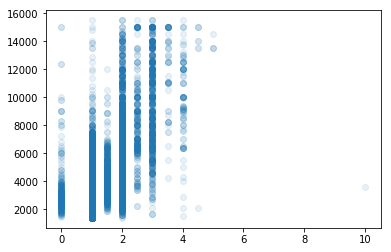

In [137]:
import matplotlib.pyplot as plt
plt.scatter(x=df['bathrooms'], y=df['price'], alpha=0.1)# trendline='ols')

In [56]:
import plotly.express as px
px.scatter_3d(df, x='latitude', y='longitude', z='price', size='bathrooms', color='bedrooms')

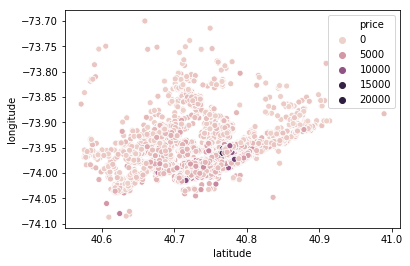

In [58]:
# not a very good visualization

import seaborn as sns

sns.set
ax = sns.scatterplot(x='latitude', y='longitude', hue='price', data=df)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# features (matrix)
x_train = df[['bedrooms']]

# target (vector)
y_train = df['price']

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
x_train.head()

bedrooms  latitude  longitude
0         3   40.7145   -73.9425
1         2   40.7947   -73.9667
2         1   40.7388   -74.0018
3         1   40.7539   -73.9677
4         4   40.8241   -73.9493

In [0]:
df_2 = df[['bedrooms', 'price']]

In [128]:
df_2[df_2['bedrooms'] == 3].head()

bedrooms  price
0         3   3000
1         3   5465
2         3   2850
3         3   3275
4         3   3350

In [99]:
bedrooms_p = [[i] for i in range(1, 5)]
predictions = model.predict(bedrooms_p)
print(f'Predicted price for 1 bedroom is {predictions[0]}, 2 bedrooms {predictions[1]},\n3 bedrooms {predictions[2]}, 4 bedrooms {predictions[3]}.')

Predicted price for 1 bedroom is 3121.228316705481, 2 bedrooms 3974.482484232912,
3 bedrooms 4827.736651760343, 4 bedrooms 5680.990819287774.


In [0]:
pred_1 = [3121.22]
true_1 = [3833.11]

In [138]:
from sklearn.metrics import mean_absolute_error

# for 1 bedroom
mean_ab_err = mean_absolute_error(pred_1, true_1)
print(f'Model error was: {mean_ab_err}')

Model error was: 711.8900000000003


In [111]:
model.coef_

array([853.25416753])

In [110]:
model.intercept_

2267.9741491780505

In [0]:
import numpy as np

In [0]:
pred_2 = [3121.22, 3643.11, 3532.55]
true_2 = [3833.11, 3753.75, 3986.16]

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]

In [157]:
pred_2

array([[3121.22]])

In [175]:
# to get R^2 we need arrays of predictions and true values as dictated by score method
# from sklearn.metrics import r2_score
# r2_score(pred_2, true_2)
# r2_score(true_2, pred_2)

-3.7916338789884794

## 3 features

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# features (matrix)
x_train = df[['bedrooms', 'latitude', 'longitude']]

# target (vector)
y_train = df['price']

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
x_train.head()

bedrooms  latitude  longitude
0         3   40.7145   -73.9425
1         2   40.7947   -73.9667
2         1   40.7388   -74.0018
3         1   40.7539   -73.9677
4         4   40.8241   -73.9493

In [132]:
#three_features_p = [[3, 41, -71]]
predictions_1 = model.predict([[2, 40.7, -73.8]])
predictions_1

array([668.68736555])

In [131]:
x_train.describe()

bedrooms      latitude     longitude
count  48818.000000  48818.000000  48818.000000
mean       1.537158     40.750756    -73.972758
std        1.106078      0.038962      0.028887
min        0.000000     40.571200    -74.087300
25%        1.000000     40.728300    -73.991800
50%        1.000000     40.751700    -73.978000
75%        2.000000     40.774000    -73.955000
max        8.000000     40.989400    -73.700100